In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib
import scienceplots
import numpy as np

In [2]:
# Importing data from cache file
cache_filename = r'C:\Users\prife\OneDrive - KTH\KTH\01 Courses\Signal Processing\Project\d4697bf6e389c57c31a69abd149a8c40.cache'
with open(cache_filename, 'rb') as file_cache:
    data = pickle.load(file_cache)

key_acc_B1WS1_R_y = 'result__GAccelerometers__RSB1WS1R__Accelerationiny'
key_acc_B2WS2_R_y = 'result__GAccelerometers__RSB2WS2R__Accelerationiny'

time = data['time']
acc_B1WS1_R_y = np.array(data[key_acc_B1WS1_R_y])
acc_B2WS2_R_y = np.array(data[key_acc_B2WS2_R_y])

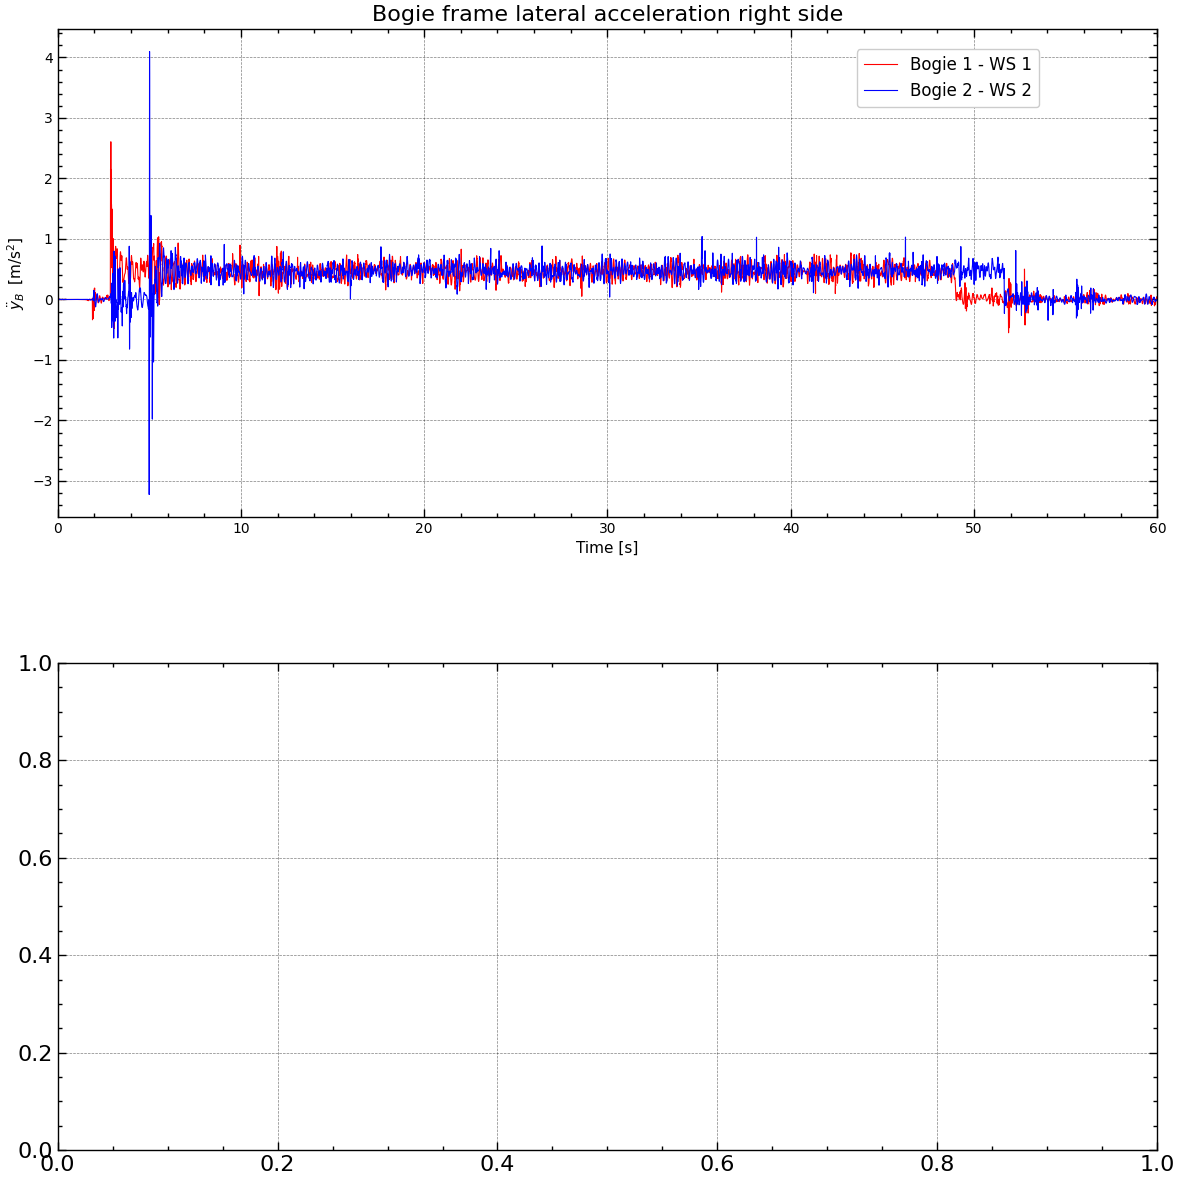

In [3]:
# Plotting raw signal
plt.style.use(['science', 'notebook', 'grid'])
matplotlib.rcParams['axes.prop_cycle'] = plt.cycler(
        color=['red', 'blue'] + plt.rcParams['axes.prop_cycle'].by_key()['color'][2:])

fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Bogie 1 - WS 1
axs.ravel()[0].plot(time, acc_B1WS1_R_y, label='Bogie 1 - WS 1', lw=0.8)
axs.ravel()[0].plot(time, acc_B2WS2_R_y, label='Bogie 2 - WS 2', lw=0.8)
axs.ravel()[0].set_xlabel(r'Time [s]', fontsize=11)
axs.ravel()[0].set_ylabel(r'$\ddot{y}_{B} \; \; \mathrm{[m/s^2]}$', fontsize=11)
axs.ravel()[0].set_title(f'Bogie frame lateral acceleration right side')
axs.ravel()[0].set_xlim(0, 60)
axs.ravel()[0].tick_params(axis='both', labelsize=10)
axs.ravel()[0].legend(loc='center right', bbox_to_anchor=(0.9, 0.9), fontsize=12, ncol=1)


plt.tight_layout()  # Adjust spacing between subplots
plt.subplots_adjust(hspace=0.3)  # Increase vertical space

plt.show()

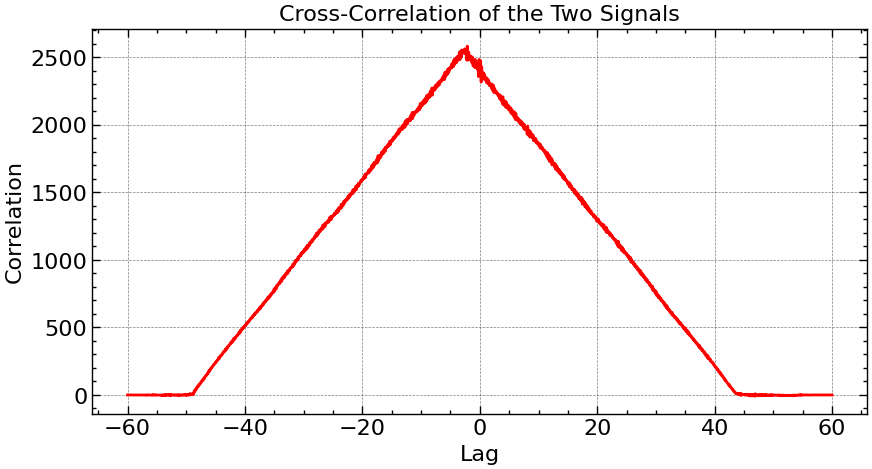

In [5]:
# Correlation
from scipy.signal import correlate

cross_corr = np.correlate(acc_B1WS1_R_y, acc_B2WS2_R_y, mode='full')
lags = np.arange(-len(acc_B1WS1_R_y) + 1, len(acc_B1WS1_R_y)) / 250

# Plotting the cross-correlation
plt.figure(figsize=(10, 5))
plt.plot(lags, cross_corr)
plt.title('Cross-Correlation of the Two Signals')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()


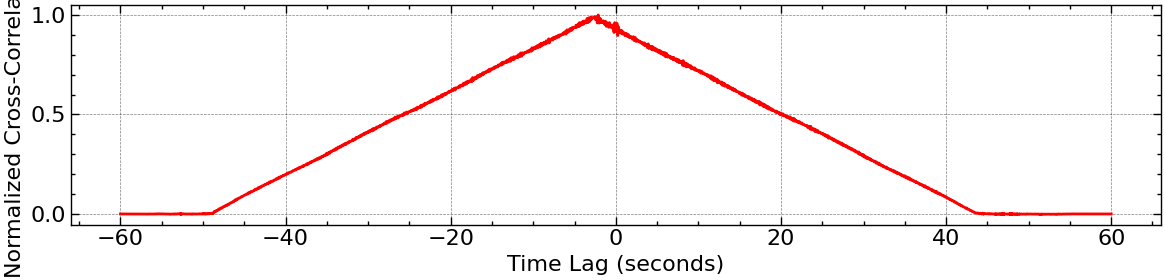

In [6]:
correlation = correlate(acc_B1WS1_R_y, acc_B2WS2_R_y, mode='full')
correlation /= np.max(np.abs(correlation))  # Normalize correlation for easy peak detection

# Define the lag indices
lags = np.arange(-len(acc_B1WS1_R_y) + 1, len(acc_B1WS1_R_y))
timeLags = lags / 250  # Convert lag indices to time (seconds)

# Find the time delay by locating the first significant peak after zero lag
# We take the positive side of timeLags for analysis
half_len = len(correlation) // 2
time_after_zero = timeLags[half_len:]
correlation_after_zero = correlation[half_len:]

# Plot the cross-correlation with the x-axis in time (seconds)
fig, axs = plt.subplots(1, 1, figsize=(12, 3))

axs.plot(timeLags, correlation)
axs.set_xlabel('Time Lag (seconds)')
axs.set_ylabel('Normalized Cross-Correlation')

plt.tight_layout()  # Leave space for the main title
plt.show()

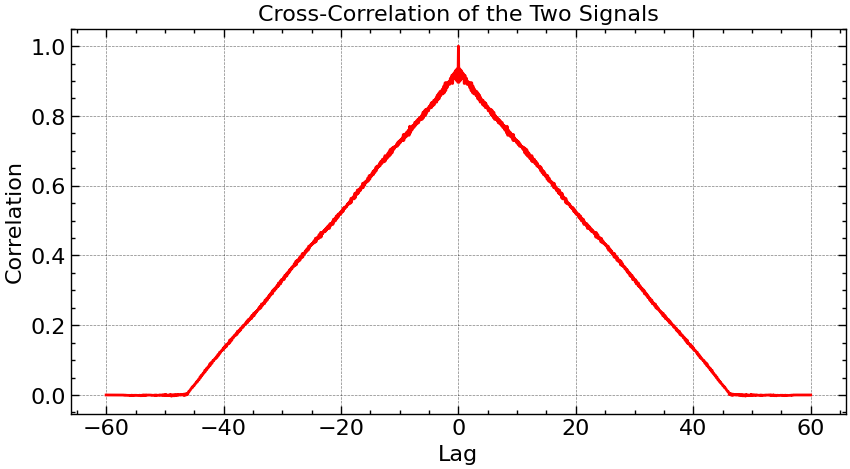

In [8]:
cross_corr = np.correlate(acc_B1WS1_R_y, acc_B1WS1_R_y, mode='full')
cross_corr /= np.max(np.abs(cross_corr))
lags = np.arange(-len(acc_B1WS1_R_y) + 1, len(acc_B1WS1_R_y)) / 250

# Plotting the cross-correlation
plt.figure(figsize=(10, 5))
plt.plot(lags, cross_corr)
plt.title('Cross-Correlation of the Two Signals')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()